In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
import os


In [3]:
train_dir = r"C:\Users\bhuva\Downloads\colon cancer detection\LC25000\Train and Validation Set"
test_dir = r"C:\Users\bhuva\Downloads\colon cancer detection\LC25000\Test Set"


In [4]:
# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary')
test_set = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), class_mode='binary')


Found 9000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# Load Pretrained Model (VGG16)
pretrained_vgg16 = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in pretrained_vgg16.layers:
    layer.trainable = False

# Add custom layers
global_avg_pool = GlobalAveragePooling2D()(pretrained_vgg16.output)
fc1 = Dense(512, activation='relu')(global_avg_pool)
fc2 = Dense(512, activation='relu')(fc1)
output = Dense(1, activation='sigmoid')(fc2)

# Build the model
model = Model(pretrained_vgg16.input, output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,6

 Total params: 15,240,513 (58.14 MB)

 Trainable params: 525,825 (2.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [6]:
hist = model.fit(training_set, epochs=5, validation_data=test_set)

# Save the trained model
model.save('colon.h5')


C:\Users\bhuva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 645s 2s/step - accuracy: 0.9068 - loss: 0.2067 - val_accuracy: 0.9890 - val_loss: 0.0306
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 737s 3s/step - accuracy: 0.9830 - loss: 0.0464 - val_accuracy: 0.9920 - val_loss: 0.0203
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 731s 3s/step - accuracy: 0.9938 - loss: 0.0197 - val_accuracy: 0.9830 - val_loss: 0.0510
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 730s 3s/step - accuracy: 0.9942 - loss: 0.0158 - val_accuracy: 0.9700 - val_loss: 0.1079
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 729s 3s/step - accuracy: 0.9868 - loss: 0.0374 - val_accuracy: 0.9940 - val_loss: 0.0145


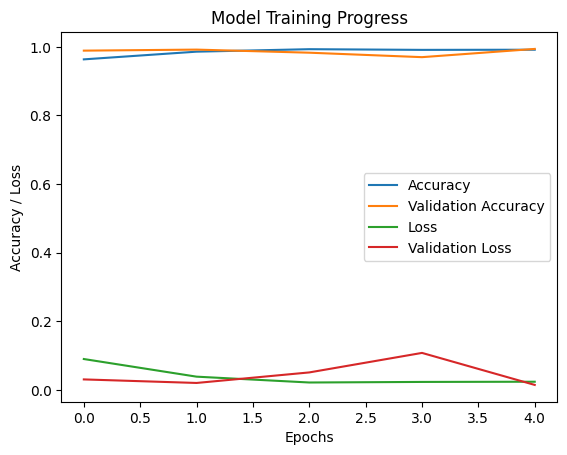

In [7]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()


In [13]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model("colon.h5")  # Ensure colon.h5 exists in your directory

# Test on a single image
img_path = r"C:\Users\bhuva\Downloads\colon cancer detection\LC25000\Test Set\colon_n\colonn4472.jpeg"  # Update with actual image path
img = image.load_img(img_path, target_size=(224, 224))
img = np.asarray(img) / 255.0  # Normalize pixel values
img = np.expand_dims(img, axis=0)  # Reshape for model input

# Make Prediction
output = model.predict(img)
print("Prediction Probability:", output[0][0])
print("Cancer Detected" if output[0][0] > 0.5 else "No Cancer Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
Prediction Probability: 0.99999547
Cancer Detected


In [1]:
import tkinter as tk
from tkinter import filedialog, Label, Button
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load Model
model = load_model("colon.h5")

# GUI Setup
root = tk.Tk()
root.title("Colon Cancer Detection")
root.geometry("600x700")
root.configure(bg="#f0f0f0")  # Light gray background

# Title Label
title_label = Label(root, text="Colon Cancer Detection", font=("Arial", 20, "bold"), fg="white", bg="#007ACC", padx=20, pady=10)
title_label.pack(fill="x")

# Function to Load and Predict
def load_and_predict():
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;*.png;*.jpeg")])
    if not file_path:
        return
    
    # Load and display image
    img = Image.open(file_path)
    img = img.resize((224, 224))
    img_tk = ImageTk.PhotoImage(img)
    image_label.config(image=img_tk)
    image_label.image = img_tk

    # Preprocess image
    img_array = np.asarray(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    prediction = model.predict(img_array)
    result = "Cancer Detected" if prediction[0][0] > 0.5 else "No Cancer Detected"
    
    # Change result label color based on detection
    if "Cancer" in result:
        result_label.config(text=result, fg="red", font=("Arial", 16, "bold"))
    else:
        result_label.config(text=result, fg="green", font=("Arial", 16, "bold"))

# GUI Elements
btn = Button(root, text="Select Image", command=load_and_predict, font=("Arial", 14, "bold"), bg="#4CAF50", fg="white", padx=20, pady=10)
btn.pack(pady=20)

image_label = Label(root, bg="white", width=300, height=300, relief="solid")
image_label.pack()

result_label = Label(root, text="Prediction: ", font=("Arial", 16), bg="#f0f0f0")
result_label.pack(pady=20)

# Run GUI
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
